<a href="https://colab.research.google.com/github/xsa-dev/Trading-Bot---Deep-Reinforcement-Learning/blob/master/summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Torch RL DQN Agent Base
## Дипломный проект по ИИ. 
```
Создание автоматизированной торговой системы
```

Студент: __Алексей Савин__

### ⚠️ Disclaimer
__The code is provided as is. No guarantees are given. This is just a draft of my diploma work that I'm submitting urgently. Before using it, thoroughly test everything and trust only your calculations.__

### ⚠️ Отказ от ответсвенности
__Код предоставляется как есть. Никакие гарантии не даются. Это просто макет дипломной работы, который я срочно сдаю. Перед использованием все тщательно тестируйте и доверяйте только своим расчетам.__

## Описание экспиремента:
Цель АТС показывать прыбыль 10% ежемесячно в месяц это:
- Еженедельная доходность: Примерно 2.33% в неделю.
- Ежедневная доходность: Примерно 0.33% в день.
- Ежечасная доходность: Примерно 0.0138% в час.

## Структура проекта
```
├── Bot_code_and_models
│   ├── agent.py - точка входа
│   ├── docs - описания (редактируемые)
│   │   └── Readme.md
│   ├── input
│   │   └── labeled_df.csv - размеченные данные
│   ├── logs - папка для Tensorboardx логов
│   ├── main.py - основа для лидерборда из RL-моделей, планируется использовать
│   ├── models - тренированные модели
│   │   ├── profit_reward_double_ddqn_model - неоптимизированная мадель (быстрее обучать)
│   │   └── profit_reward_double_ddqn_model_optimised - оптимизированная (долго учиться)
│   ├── notebooks - ноутбуки для исследования 
│   │   ├── append_jsonl.ipynb - склейка свечей (тест)
│   │   ├── dataset.ipynb - обогащение датасета (начало)
│   │   ├── download_data.ipynb - загрузка данных (ccxt)
│   │   ├── download_yf.ipynb - загрузка данных (yahoo finance)
│   │   ├── research.ipynb - изучения примера RL DQN агента
│   │   └── tensors_build.ipynb - билд тенсоров (для оптимизации модели, пример)
│   ├── src
│   │   ├── Agent.py - класс агента для работы в среде 
│   │   ├── Environment.py - очень простая эмуляция торгового терминала 
│   │   ├── __init__.py
│   │   ├── models.py - варианты DQN сетей (pyTorch)
│   │   └── utils.py - вспомогательные утилиты
│   └── train_test.py - перезапуск обучения по всем моделям, синхронный 😓
├── docker-compose.yaml - докер-композ (для интерграции в продакшн)
├── Dockerfile - докер-файл (для сборки образа)
├── LICENSE - лицензируемость кода
├── LLM 
│   ├── about.txt - гипотеза о возможности применения Трансформеров
│   └── fingpt.py - пример opensource решения (в разработке)
├── Readme.md - описание 
├── requirements.txt - зависимости
└── summary.ipynb - этот файл
```

## Параметры тестирования:
- кол-во минутных свечей: 1440 / 60 = 24 случайных часа из выборки по BTCUSD за 3 года
- ниже пред

### Random ROI backtest #1
```
+----------------+-----------------+----------------+----------------+-----------+
| Trading System | Avg. Return (%) | Max Return (%) | Min Return (%) | Std. Dev. |
+----------------+-----------------+----------------+----------------+-----------+
|   ProfitDDQN   |       0.03      |      4.40      |     -2.06      |    0.24   |
+----------------+-----------------+----------------+----------------+-----------+
```

```
+----------------+-----------------+----------------+----------------+-----------+
| Trading System | Avg. Return (%) | Max Return (%) | Min Return (%) | Std. Dev. |
+----------------+-----------------+----------------+----------------+-----------+
|   ProfitDDQN   |       0.01      |      6.65      |     -4.22      |    0.23   |
+----------------+-----------------+----------------+----------------+-----------+
```

#### Random ROI backtest #2
```
+----------------+-----------------+----------------+----------------+-----------+
| Trading System | Avg. Return (%) | Max Return (%) | Min Return (%) | Std. Dev. |
+----------------+-----------------+----------------+----------------+-----------+
|   ProfitDDQN   |      -0.00      |      0.12      |     -0.22      |    0.01   |
+----------------+-----------------+----------------+----------------+-----------+
```
```
+----------------+-----------------+----------------+----------------+-----------+
| Trading System | Avg. Return (%) | Max Return (%) | Min Return (%) | Std. Dev. |
+----------------+-----------------+----------------+----------------+-----------+
|   ProfitDDQN   |      -0.00      |      0.13      |     -0.09      |    0.01   |
```

# Без оптимизации тест на 400 ticks (100 tests) показывает достаточный результат
```
+----------------+-----------------+----------------+----------------+-----------+
| Trading System | Avg. Return (%) | Max Return (%) | Min Return (%) | Std. Dev. |
+----------------+-----------------+----------------+----------------+-----------+
|   ProfitDDQN   |       0.01      |      1.59      |     -0.57      |    0.11   |
+----------------+-----------------+----------------+----------------+-----------+
```
<b>🚀 UNDER 🚀 DEVELOPMENT🚀 </b>

## Дополнительное улучшение разметки 

Так же было выполнено [обогащение данных](dataset_2.ipynb), но положительного результаты это пока не принесло.

### По резульатам тестирования
Модель с выключенной оптимизацией показывает лучшие результаты по критериям: скорость обучения / общая доходность.

# Архитекрута модели

## Основные характеристики этой модели:
```
Bot_code_and_models/src/models.py : class ConvDQN.__init__
```
- Использует сверточные слои (Conv1d) для извлечения признаков из входных данных.
- Применяет пулинг (MaxPooling) и активацию (LeakyReLU) для уменьшения размерности и введения нелинейности.
- Производит последовательные сверточные операции для извлечения высокоуровневых признаков.
- Вычисляет выходной слой (Linear) для предсказания действия агента в данном состоянии.

```
Bot_code_and_models/src/models.py : class ConvDQN.forward
```
Эта функция представляет собой процесс прямого прохода (forward pass) в сверточной нейронной сети типа ConvDQN. Она выполняет следующие шаги:

- Применяет первый сверточный слой (self.conv1) к входному тензору x.
- Применяет функцию активации LeakyReLU (self.LRelu) к выходу из первого сверточного слоя.
- Применяет операцию максимального пулинга (MaxPooling) к выходу из первого сверточного слоя после активации.
- Применяет второй сверточный слой (self.conv2) к выходу из первого пулингового слоя.
- Повторно применяет LeakyReLU и максимальное пулинг к выходу из второго сверточного слоя.
- Выполняет операцию "вытягивания" (flattening) для преобразования данных в плоский вектор.
- Передает вытянутый вектор через полносвязный слой (self.out_layer) для предсказания действия агента в данном состоянии.
- Возвращает результирующий тензор после применения LeakyReLU к выходу полносвязного слоя.

Таким образом, эта функция выполняет прямой проход по сверточной нейронной сети, преобразуя входные данные в предсказанные действия агента в задаче обучения с подкреплением.





## График обучения:
На картинке предоставлен график обучения из Tensorboardx:

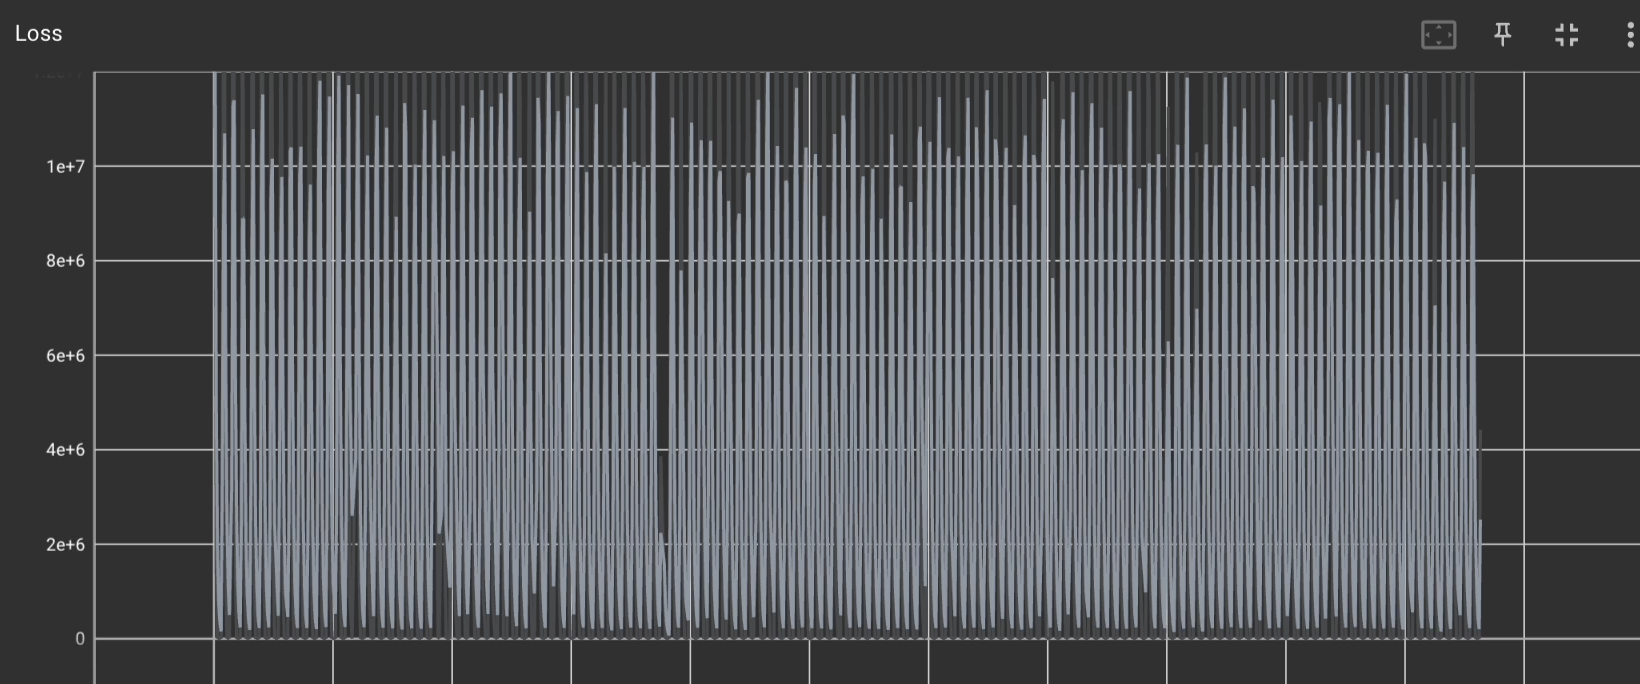

## Agent

```
Bot_code_and_models/src/Agent.py
```

Этот класс представляет собой агента для взаимодействия с окружением в задаче обучения с подкреплением. Вот краткое описание атрибутов и методов этого класса:

**Атрибуты класса:**

1. `REPLAY_MEM_SIZE`: Максимальный размер памяти воспроизведения.
2. `BATCH_SIZE`: Размер пакета (batch) для обучения.
3. `GAMMA`: Коэффициент дисконтирования, который влияет на значимость будущих ожидаемых вознаграждений.
4. `EPS_START`: Начальное значение для epsilon в стратегии выбора действий (e-greedy).
5. `EPS_END`: Конечное значение для epsilon в стратегии выбора действий.
6. `EPS_STEPS`: Количество шагов, необходимых для перехода от `EPS_START` к `EPS_END`.
7. `LEARNING_RATE`: Скорость обучения оптимизатора.
8. `INPUT_DIM`: Размерность входных данных (без учета размера пакета).
9. `HIDDEN_DIM`: Размер скрытого слоя (для линейных моделей).
10. `ACTION_NUMBER`: Размер выходного слоя сети Q.
11. `TARGET_UPDATE`: Период обновления целевой сети Q.
12. `MODEL`: Тип модели (например, "ddqn" или "dqn").
13. `DOUBLE`: Флаг, указывающий, используется ли "Double Q-learning".
14. `TRAINING`: Флаг, указывающий, идет ли обучение.

**Методы класса:**

1. `__init__(self, ...)`: Конструктор класса, инициализирует атрибуты агента, включая параметры обучения и нейронные сети.

2. `select_action_tensor(self, state)`: Метод для выбора действия с учетом стратегии выбора действий (epsilon-greedy).

3. `optimize_model(self)`: Метод для оптимизации модели с помощью обучения на пакете данных из памяти воспроизведения. Используется для обучения сети Q.

4. `optimize_double_dqn_model(self)`: Метод для оптимизации модели с использованием метода "Double Q-learning". Также используется для обучения сети Q.

5. `train(self, env, path, num_episodes)`: Метод для обучения агента в заданной среде в течение заданного количества эпизодов. Возвращает накопленное вознаграждение для каждого эпизода.

6. `test(self, env_test, model_name=None, path=None)`: Метод для тестирования агента в заданной среде. Может загружать заранее обученную модель для тестирования. Возвращает накопленное вознаграждение и список вознаграждений для каждого шага.

Этот класс предназначен для обучения и тестирования агента в среде с использованием обучения с подкреплением. Он реализует методы выбора действий, обучения сети Q и другие необходимые операции для выполнения задачи обучения с подкреплением.

## Environment

```
Bot_code_and_models/src/Environment.py
```

Этот класс представляет собой среду (environment) для обучения агента в задаче обучения с подкреплением. Вот краткое описание этого класса:

**Атрибуты класса**:

data: Временной ряд, представленный в виде объекта pandas DataFrame, используется как входные данные для среды.
reward_f: Тип функции вознаграждения, который можно выбрать между "sharpe ratio" ("sr") и "profit" ("profit").

**Методы класса**:

- ```__init__(self, data, reward)```: Конструктор класса, инициализирует атрибуты среды, включая временной ряд данных и тип функции вознаграждения.
- reset(self): Метод для сброса состояния среды или начальной инициализации. Важно вызвать этот метод перед началом каждого эпизода.
- ```get_state(self)```: Метод для получения текущего состояния среды. Возвращает текущее состояние в виде тензора.
- ```step(self, act)```: Метод для выполнения действия агента в среде. Оценивает награду за выполненное действие, обновляет состояние среды и возвращает награду, флаг окончания эпизода и новое состояние.

Этот класс представляет собой абстракцию среды, в которой агент может выполнять действия и получать награды в ответ. Он используется для обучения агента в задаче обучения с подкреплением, где агент пытается научиться принимать решения, максимизирующие некоторую целевую функцию (награду) на основе предоставленных данных.

# Что такое Reinforcement Learning

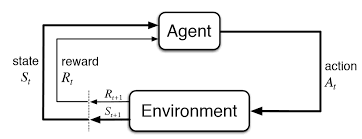


Обучение с подкреплением (Reinforcement Learning) - это тип машинного обучения, где агент учится принимать последовательность решений, взаимодействуя с окружающей средой, с целью максимизации общей награды.



**DQN (Deep Q-Network)** - это алгоритм обучения с подкреплением, который использует нейронные сети для приближения оптимальной стратегии агента в задачах управления и принятия решений. DQN был представлен в работе "Human-level control through deep reinforcement learning" и является формой Q-обучения, где целью является обучение агента принимать оптимальные действия в среде, чтобы максимизировать накопленную награду.

Основные черты DQN включают в себя использование нейронных сетей для аппроксимации функции Q-оценки, а также применение метода экспериенс-переигрывания (experience replay), который позволяет агенту обучаться на основе случайно выбираемых образцов из прошлого опыта. Это улучшает стабильность обучения и позволяет агенту собирать и повторно использовать информацию о прошлых действиях.

DQN может быть успешно применен в различных задачах, таких как игры настольного тенниса, игры на Atari и других видеоиграх, а также в робототехнике и управлении системами. Этот метод оказался весьма эффективным и помог сделать значительные шаги в области обучения с подкреплением на основе нейронных сетей.

# Что дальше?

## Результаты после добавления универсальной разметки

```
+----------------+-----------------+----------------+----------------+-----------+
| Trading System | Avg. Return (%) | Max Return (%) | Min Return (%) | Std. Dev. |
+----------------+-----------------+----------------+----------------+-----------+
|   ProfitDDQN   |      -0.00      |      0.03      |     -0.06      |    0.01   |
+----------------+-----------------+----------------+----------------+-----------+
```
Показывает худшие результаты чем (тест на 1000 случайных окон за более чем 500000 минутных свечей):


## Оптимизация 
- Оптимизированная модель тренировалась примерно 4 часа и показывает очень средние результаты на поминутных свечах тестами, что по времени проигрывает неоптимизированному варианту, котороый по плану перенести на стенд (подготовка в production)

```
+----------------+-----------------+----------------+----------------+-----------+
| Trading System | Avg. Return (%) | Max Return (%) | Min Return (%) | Std. Dev. |
+----------------+-----------------+----------------+----------------+-----------+
|   ProfitDDQN   |       0.02      |      0.88      |     -0.54      |    0.17   |
+----------------+-----------------+----------------+----------------+-----------+
```

# Тестирование
Было выполнено обучение на данных за год и обучение для торговли на коротком промежутке времени. Обучение заняло 20000 эпох и несколько дней реального времени. Для тестирования были загружены данные за 1 день (точно отсутствующие в ежедневной выборке). Тестирование показало результат удовлетворительные результаты:

In [1]:
""""
1: 1000 тестовых итераций:

+--------------------+-----------------+----------------+----------------+-----------+
|   Trading System   | Avg. Return (%) | Max Return (%) | Min Return (%) | Std. Dev. |
+--------------------+-----------------+----------------+----------------+-----------+
| ProfitDDQN (stats) |       0.01      |      0.53      |     -0.27      |    0.04   |
+--------------------+-----------------+----------------+----------------+-----------+
+-----------------------+-------------------+------------------+------------------+-----------+
|        Metrics        | Avg. Accuracy (%) | Max Accuracy (%) | Min Accuracy (%) | Std. Dev. |
+-----------------------+-------------------+------------------+------------------+-----------+
| ProfitDDQN (accuracy) |        0.57       |       1.00       |       0.20       |    0.30   |
+-----------------------+-------------------+------------------+------------------+-----------+

2: 1000 тестовых итераций:
Iteration:  1000
+--------------------+-----------------+----------------+----------------+-----------+
|   Trading System   | Avg. Return (%) | Max Return (%) | Min Return (%) | Std. Dev. |
+--------------------+-----------------+----------------+----------------+-----------+
| ProfitDDQN (stats) |       0.01      |      0.57      |     -0.22      |    0.04   |
+--------------------+-----------------+----------------+----------------+-----------+
+-----------------------+-------------------+------------------+------------------+-----------+
|        Metrics        | Avg. Accuracy (%) | Max Accuracy (%) | Min Accuracy (%) | Std. Dev. |
+-----------------------+-------------------+------------------+------------------+-----------+
| ProfitDDQN (accuracy) |        0.55       |       1.00       |       0.20       |    0.30   |
+-----------------------+-------------------+------------------+------------------+-----------+
"""

'"\n+--------------------+-----------------+----------------+----------------+-----------+\n|   Trading System   | Avg. Return (%) | Max Return (%) | Min Return (%) | Std. Dev. |\n+--------------------+-----------------+----------------+----------------+-----------+\n| ProfitDDQN (stats) |       0.01      |      0.53      |     -0.27      |    0.04   |\n+--------------------+-----------------+----------------+----------------+-----------+\n+-----------------------+-------------------+------------------+------------------+-----------+\n|        Metrics        | Avg. Accuracy (%) | Max Accuracy (%) | Min Accuracy (%) | Std. Dev. |\n+-----------------------+-------------------+------------------+------------------+-----------+\n| ProfitDDQN (accuracy) |        0.57       |       1.00       |       0.20       |    0.30   |\n+-----------------------+-------------------+------------------+------------------+-----------+\n'

# Переход в продакшн

Планируется:
1) Предсказывать следующую свечу каждые 4-5 минут в зависимости от ожидания среды
2) Среда будет оптимизирована под конкретный терминал
3) Код интеграции будет закрытый (другой репозиторий)
4) После кратного периода времени завершить тестирование и принимать решение о переводе, доработке, отказе в публикации людям
5) Планирование новой версии
**(генетические алгоритмы еще не использовались)**